## **Muhammad Daffa Putra Mahardika**
## **2009106036**
## **Posttest 6**

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

df = pd.read_csv("bodyPerformance2.csv")

df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,F,M
0,27,M,172.3,75.0,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,0.0,1.0
1,25,M,165.0,55.0,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,0.0,1.0
2,31,M,179.6,78.0,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,0.0,1.0
3,32,M,174.5,71.0,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,0.0,1.0
4,28,M,173.8,67.0,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,0.0,1.0


# Membuat objek dari k means dengan jumlah cluster = 3

In [24]:
model = KMeans(n_clusters=3)

# Memilih atribut yang akan dilatih

In [25]:
points = df[["height_cm","weight_kg"]]

# Melakukan fit terhadap model

In [26]:
model.fit(points)

KMeans(n_clusters=3)

# Menentukan label untuk cluster

In [27]:
labels = model.labels_
labels

array([2, 0, 1, ..., 0, 0, 0], dtype=int32)

# Memasukan atribut class ke dalam variabel

In [28]:
classX = df['class']

# Membuat dataframe dengan label dan class sebagai kolom

In [29]:
dfKmeans = pd.DataFrame({'labels': labels, 'class': classX})

# buat crosstab: ct
ct = pd.crosstab(dfKmeans["labels"],dfKmeans["class"])

# Print ct
print(ct)

class     A    B    C    D
labels                    
0       316  257  260  214
1       108  136  164  263
2       307  328  388  259


# Memvisualisasikan dari hasil model

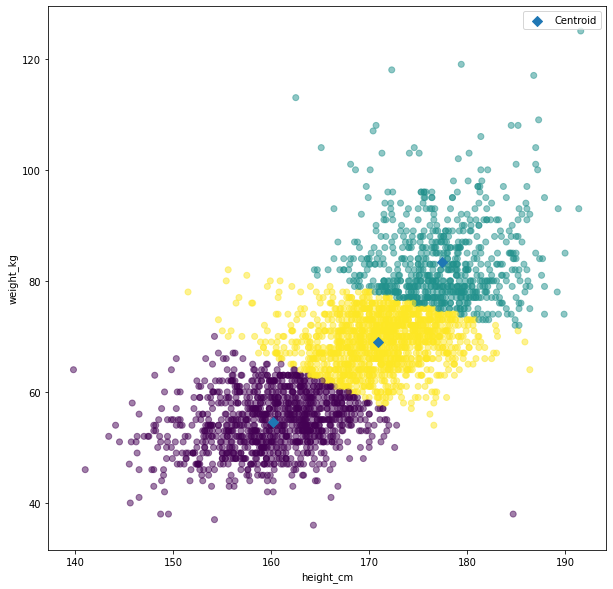

In [30]:
import matplotlib.pyplot as plt

# mengambil semua baris pada kolom tertentu (dalam bentuk array)
xs = points.iloc[:,0]
ys = points.iloc[:,1]

# Menampung koordinat dari tiap centroid
centroids = model.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# visualisasi cluster
plt.figure(figsize=(10,10))
plt.scatter(xs,ys,alpha=0.5,c=labels)
plt.scatter(centroids_x,centroids_y,marker="D",s=50,label="Centroid")
plt.xlabel("height_cm")
plt.ylabel("weight_kg")
plt.legend()
plt.show()